In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

In [ ]:
import sys
sys.path.append('..')
from simtools import Strip

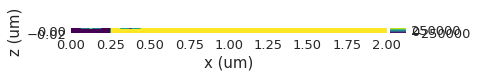

In [16]:
l = 2000e-9
s = Strip(l, 100e-9, 10e-9, 20e-9, '.', initpattern='oixxxxxx')
s.system.m.plane('y').z.mpl()

Running OOMMF (ExeOOMMFRunner)[2022/09/01 09:28]... (113.4 s)
Running OOMMF (ExeOOMMFRunner)[2022/09/01 09:30]... (213.8 s)


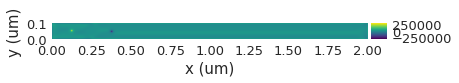

In [17]:
s.min_drive(fixed=True)
s.min_drive()
s.system.m.plane(z=1e-9).z.mpl()

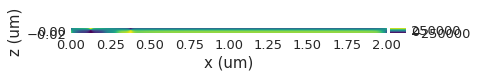

In [18]:
s.system.m.plane('y').z.mpl()

In [20]:
td = oc.TimeDriver()

In [21]:
import pathlib

In [22]:
muB = 9.274e-24

def J2ux(J, P=.5):
    Ms = mbp.Strip.FeGe['Ms']
    return J * P * mm.consts.g * muB / (2 * mm.consts.e * Ms)

In [ ]:
t = 30e-9
s.system.dynamics += mm.ZhangLi(u=J2ux(5e11), beta=0.56)
td.drive(s.system, dirname=f'simulations/J_5e+11', t=t, n=round(t * 1e9) * 100)